In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
%matplotlib notebook
import networkx as nx

In [2]:
def read_output(file):
    loops = []
    paths = []
    with open(file, 'r') as f:
        lines = f.readlines()
        for lidx, line in enumerate(lines):
            b = [int(i) for i in  line.strip().split(" ")[1:]]
            if(line[0] == 'b'):
                loops.append(b[:])
            else:
                paths.append(b[:])
                     
    return loops, paths

def read_input(town):
    t = 'Type'
    df_nodes = pd.read_csv(f"{town}/nodes.csv", sep=";")
    X = np.array(df_nodes['X'])
    Y = np.array(df_nodes['Y'])
    C = np.where(df_nodes[t] == 'distribution')[0]
    T = np.where(df_nodes[t] != 'distribution')[0]
    D = np.concatenate([[0], np.array(pd.read_csv(f"{town}/distances.csv", sep=";")).reshape(-1)])
    D = D.reshape((X.size, X.size))
    return X, Y, C, T, D

def check_output(D, C, loops, paths):
    n = D.shape[0]
    connected = np.zeros(n, dtype=bool)
    for loop in loops:
        if(len(loop) > 30):
            raise ValueError(f"loop too long : {len(loop)}")
        if(loop[0] not in C):
            raise ValueError(f"loop must start with a square (but starts with {loop[0]})")
        for node in loop[1:]:
            if(connected[node]):
                raise ValueError(f"The node {node} is already in a loop")
            elif(node in C):
                raise ValueError(f"Node {node} is a square, it can not be in a loop (just at the beginning)")
            else:
                connected[node] = True
    
    for path in paths:
        if(not(connected[path[0]]) and path[0] not in C):
            raise ValueError(f"The node {path[0]} starts a path but is not in a loop")
    
    for path in paths:
        for node in path[1:]:
            if(connected[node]):
                raise ValueError(f"Node {node} is already in a path or in a loop")
            elif(node in C):
                raise ValueError(f"Node {node} is a square, it can not be in a path (just at the beginning)")
            else:
                connected[node] = True
    
    connected[C] = True
    if(not(np.all(connected))):
        raise ValueError(f"Some nodes aren't connected to internet. Nodes : {np.where(connected == False)}")
        
def plot(X, Y, C, T, loops, paths):
    plt.figure(figsize=(12, 8))
    plt.scatter(X[T], Y[T], marker="^")
    plt.scatter(X[C], Y[C], marker="s")
    for loop in loops:
        plt.plot(X[loop + [loop[0]]], Y[loop + [loop[0]]])
    
    for path in paths:
        plt.plot(X[path], Y[path], linestyle="--", color="grey")

<IPython.core.display.Javascript object>


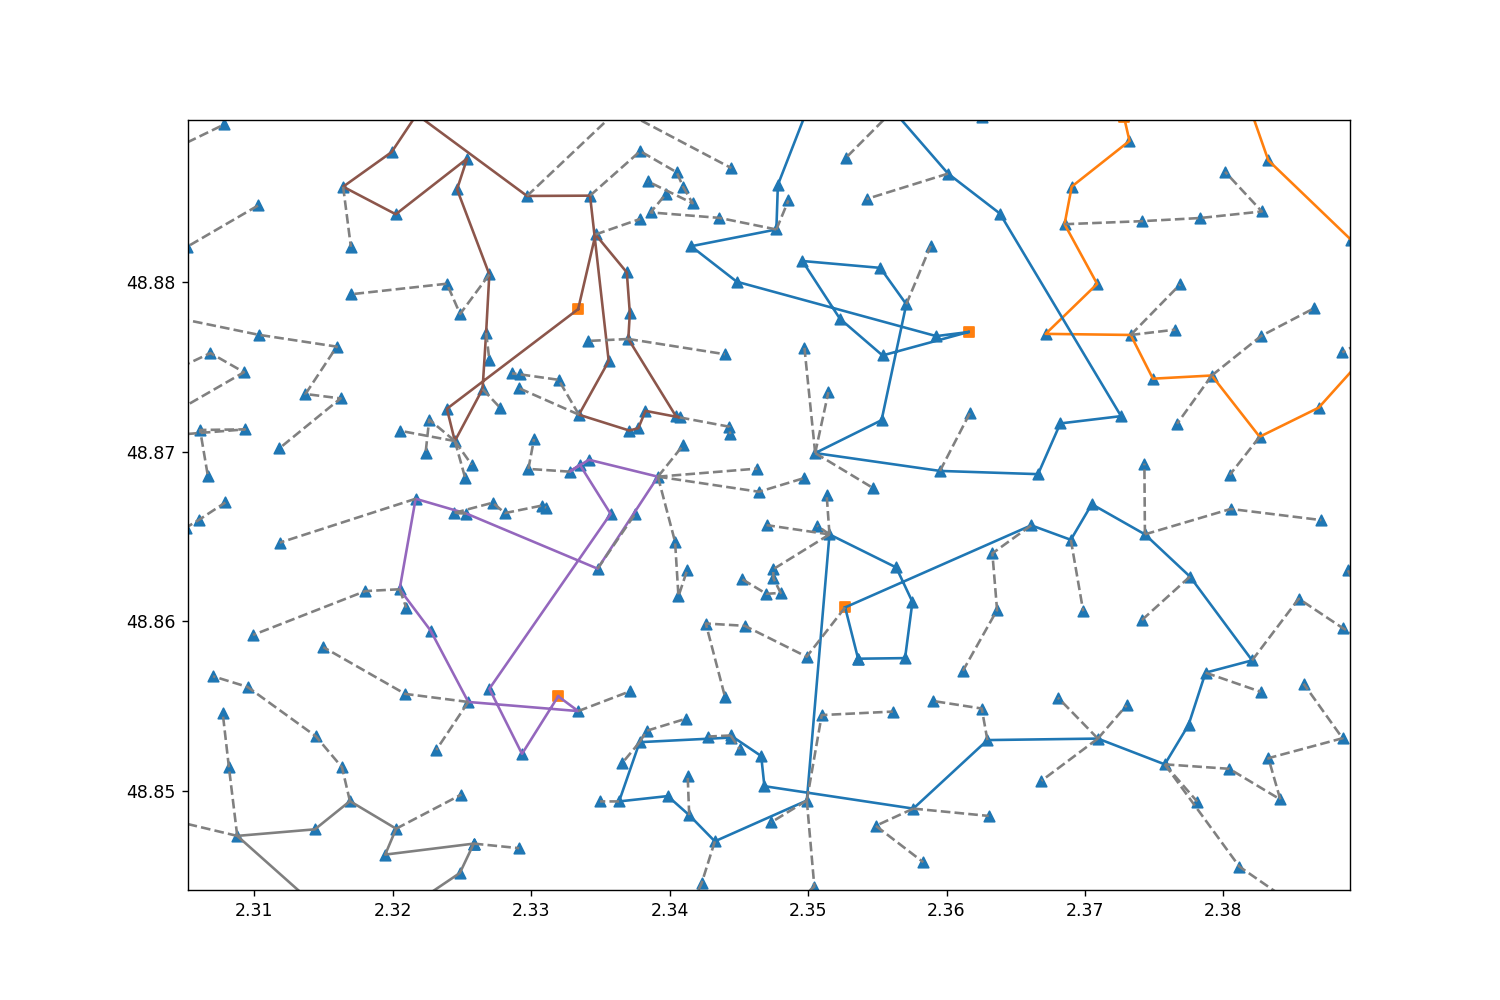

In [3]:
X, Y, C, T, D = read_input("pim")
loops, paths = read_output("pim.out")

check_output(D, C, loops, paths)

plot(X, Y, C, T, loops, paths)